In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4502,1264-BYWMS,Male,0,No,No,55,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.80,5283.95,Yes
4099,6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No
1878,0463-WZZKO,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.75,67.1,No
2842,1215-VFYVK,Female,0,No,No,4,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,No,Mailed check,48.25,202.25,No
188,0956-SYCWG,Female,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.65,244.8,No


In [7]:
df.Churn.value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df.shape[0]

7043

In [9]:
517400/df.shape[0]


73.46301292063042

In [10]:
df.drop('customerID', axis='columns', inplace=True)


In [11]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [14]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df.shape


(7043, 20)

In [16]:
df.iloc[488].TotalCharges


' '

In [17]:
df[df.TotalCharges != ' '].shape


(7032, 20)

In [18]:
df1 = df[df.TotalCharges != ' ']
df1.shape


(7032, 20)

In [19]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [21]:
df1.TotalCharges.dtype

dtype('float64')

In [22]:
df1[df1.Churn == 'No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


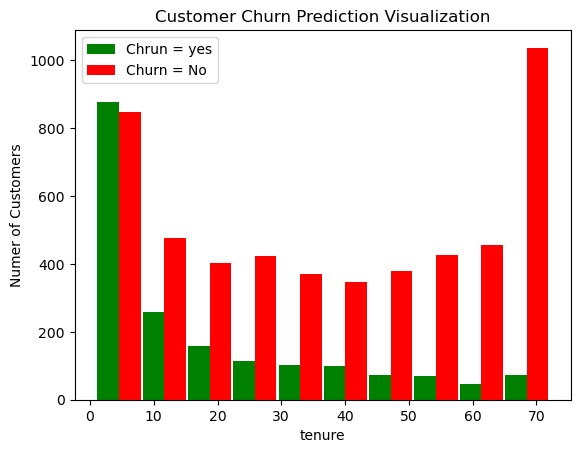

In [23]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Numer of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.955, color = ['green', 'red'], label=['Chrun = yes', 'Churn = No'])
plt.legend()

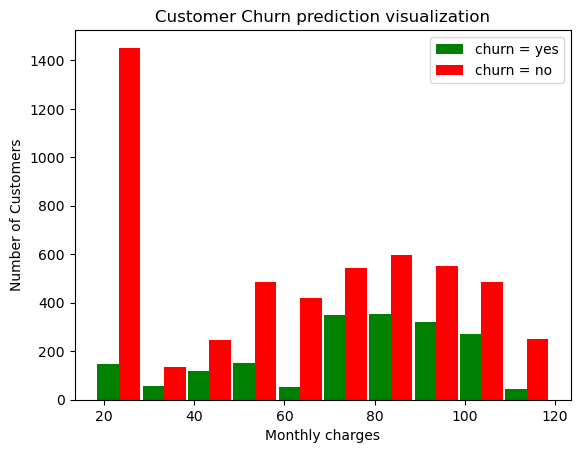

In [24]:
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green', 'red'], label=['churn = yes', 'churn = no'])
plt.legend()

In [25]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column}: {df[column].unique()}')

In [26]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [27]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [28]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [29]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [30]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [31]:
df1['gender'].replace({'Female' : 1, 'Male': 0}, inplace=True)

In [32]:
df1.gender.unique()

array([1, 0])

In [33]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1940,0,0,0,0,63,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
2574,0,1,0,0,39,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1590,1,0,1,1,63,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6299,1,0,0,0,52,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
1752,0,0,1,0,27,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [35]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [36]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [38]:
X = df2.drop('Churn', axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [39]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [40]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [41]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [42]:
X_train.shape

(5625, 26)

In [43]:
X_test.shape

(1407, 26)

In [44]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [45]:
len(X_train.columns)

26

In [46]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report


In [47]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
    keras.layers.Dense(26, input_dim=26, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

  if weights == -1:
    model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weight=weights)

  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print('Classification report: \n', classification_report(y_test, y_preds))

  return  y_preds

In [48]:
# y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

In [49]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [50]:
count_class_0

5163

In [51]:
count_class_1

1869

In [52]:
df_class_0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6,0,0,0,1,0.295775,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,0.126761,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1,0,0,0,1.000000,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [53]:
df_class_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,0.098592,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
8,1,0,1,0,0.380282,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
13,0,0,0,0,0.676056,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [54]:
print(' Method 1: Undersampling')

 Method 1: Undersampling


In [55]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print('Random under-sampling:')
print(df_test_under.Churn.value_counts())


Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [56]:
df_test_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2692,1,0,0,0,0.295775,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3669,0,0,0,0,0.605634,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
6835,0,0,1,0,0.929577,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1093,1,0,1,1,0.985915,1,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
6282,0,0,1,1,0.042254,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7026,1,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
7032,0,1,0,0,0.000000,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7034,1,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [57]:
X= df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [59]:
# y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

In [60]:
print('Method 2: Over Sampling')

Method 2: Over Sampling


In [61]:
count_class_0, count_class_1

(5163, 1869)

In [62]:
df_class_1.shape

(1869, 27)

In [63]:
# duplicate the samples
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape


(5163, 27)

In [64]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [65]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [66]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [67]:
# y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


In [68]:
#Method3: SMOTE

X = df2.drop('Churn', axis='columns')
y = df2['Churn']


In [69]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [70]:
# Can't use SMOTE because I can't use imblearn

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampleing_strategy='minority')
# X_sm, y_sm=smote.fit_sample(X,y)

# y_sm.value_counts()

In [72]:
#Method4: Use of Ensemble with undersampling

df2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [73]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [75]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [77]:
4130/3

1376.6666666666667

In [80]:
df3=X_train.copy()
df3['Churn']=y_train

In [81]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]


In [82]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [84]:
df3_class0[:1495].shape

(1495, 27)

In [86]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Churn', axis='columns')
  y_train = df_train.Churn

  return X_train, y_train

In [90]:
X_train, y_train=get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-05 12:09:06.808395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-05 12:09:06.816785: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-01-05 12:09:07.050890: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2023-01-05 12:09:07.287013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 10ms/step - loss: 0.5993 - accuracy: 0.7080
Epoch 2/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5074 - accuracy: 0.7599
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4937 - accuracy: 0.7635
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4870 - accuracy: 0.7712
Epoch 5/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4836 - accuracy: 0.7726
Epoch 6/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4796 - accuracy: 0.7742
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4765 - accuracy: 0.7732
Epoch 8/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4744 - accuracy: 0.7749
Epoch 9/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4718 - accuracy: 0.7756
Epoch 10/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4704 - accuracy: 0.7779
Epoch 11/100
94/94 [

2023-01-05 12:10:25.595681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 6ms/step - loss: 0.5713 - accuracy: 0.7193
[0.5713217258453369, 0.7192608714103699]
44/44 [==============================] - 0s 3ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      1033
           1       0.48      0.74      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.72      0.69      1407
weighted avg       0.78      0.72      0.73      1407



2023-01-05 12:10:26.017339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [91]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
 1/94 [..............................] - ETA: 31s - loss: 0.7041 - accuracy: 0.5625

2023-01-05 12:10:43.083092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 10ms/step - loss: 0.6154 - accuracy: 0.6783
Epoch 2/100
94/94 [==============================] - 1s 9ms/step - loss: 0.5200 - accuracy: 0.7465
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4990 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4912 - accuracy: 0.7595
Epoch 5/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4867 - accuracy: 0.7625
Epoch 6/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4847 - accuracy: 0.7625
Epoch 7/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4820 - accuracy: 0.7642
Epoch 8/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4790 - accuracy: 0.7645
Epoch 9/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4774 - accuracy: 0.7662
Epoch 10/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4767 - accuracy: 0.7649
Epoch 11/100
94/94 

2023-01-05 12:12:01.206160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 7ms/step - loss: 0.5898 - accuracy: 0.7178
[0.5897848606109619, 0.7178394198417664]
44/44 [==============================] - 0s 3ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      1033
           1       0.48      0.74      0.58       374

    accuracy                           0.72      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.72      0.73      1407



2023-01-05 12:12:01.611991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [92]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
 1/83 [..............................] - ETA: 28s - loss: 0.7633 - accuracy: 0.3438

2023-01-05 12:12:03.334167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 1s 14ms/step - loss: 0.6264 - accuracy: 0.6664
Epoch 2/100
83/83 [==============================] - 1s 8ms/step - loss: 0.5146 - accuracy: 0.7609
Epoch 3/100
83/83 [==============================] - 1s 9ms/step - loss: 0.4885 - accuracy: 0.7613
Epoch 4/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4824 - accuracy: 0.7662
Epoch 5/100
83/83 [==============================] - 1s 10ms/step - loss: 0.4767 - accuracy: 0.7696
Epoch 6/100
83/83 [==============================] - 1s 9ms/step - loss: 0.4742 - accuracy: 0.7750
Epoch 7/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4725 - accuracy: 0.7791
Epoch 8/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4694 - accuracy: 0.7829
Epoch 9/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4648 - accuracy: 0.7814
Epoch 10/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4650 - accuracy: 0.7822
Epoch 11/100
83/83 

2023-01-05 12:13:12.070804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 0s 7ms/step - loss: 0.6194 - accuracy: 0.6766
[0.6194002032279968, 0.676616907119751]
44/44 [==============================] - 0s 2ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.63      0.74      1033
           1       0.44      0.80      0.57       374

    accuracy                           0.68      1407
   macro avg       0.67      0.71      0.65      1407
weighted avg       0.77      0.68      0.70      1407



2023-01-05 12:13:12.496361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Average all the result

In [93]:
vote1 = 1
vote2 = 1
vote3 = 1

vote1+vote2+vote3

3

In [94]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones =y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones>1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [95]:
y_pred_final

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [96]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1033
           1       0.47      0.77      0.58       374

    accuracy                           0.71      1407
   macro avg       0.68      0.72      0.68      1407
weighted avg       0.78      0.71      0.72      1407

